# Causal Inference with CausalML
- Beiqi Zhou 260742459

## 1. Context

- We will be looking at the effect of the new technology (New technology has been implemented after 2014) on surgical site infection (SSI). 
- The new technolpgy is only used on platics surgery. Therefore, our treatment group will be the patients with Plastic = 1, and our control group will be the patients with Platics = 0. 
- The exposure of the new technology can be correlated with the lower surgical site infection but in order to conclude a causal relationship, we will need to control all the confounders that could potentially be correlated with the new technology and cause lower SSI
- Condounders in this case will include: a patient's sex, type of surgery (CPT), age, height, weight, BMI, HyperMed, Dialysis, Diabete, Smoke, Level of importance

## 2. Dataset

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/becky/OneDrive/Desktop/Winter term/INSY695-Adv Topics/Case1Data.csv")
df.head()

,SEX,CPT,ELECTSURG,AGE,HEIGHT,WEIGHT,BMI,HYPERMED,DIALYSIS,DIAB,SMOKE,WNDCLAS,ASACLAS,OPTIME,Plastic,After2014,URR,SSI
0,female,19364,Yes,46,68,211,32.082113,No,No,No,No,1,2,8.8833,1,0,1,1
1,female,19364,Yes,51,62,112,20.484859,No,No,No,No,1,1,8.4500,1,0,0,0
2,female,19364,Yes,48,66,110,17.754283,Yes,No,No,No,1,3,11.9333,1,0,1,1
3,female,19364,Yes,42,63,222,39.325134,No,No,No,No,3,2,10.6833,1,0,0,0
4,female,19364,Yes,35,64,113,19.396208,No,No,No,No,1,2,5.7500,1,0,0,0


## 3. Clean Data

In [2]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [3]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


- There is no missing value

In [4]:
df.columns

Index(['SEX', 'CPT', 'ELECTSURG', 'AGE', 'HEIGHT', 'WEIGHT', 'BMI', 'HYPERMED',
       'DIALYSIS', 'DIAB', 'SMOKE', 'WNDCLAS', 'ASACLAS', 'OPTIME', 'Plastic',
       'After2014', 'URR', 'SSI'],
      dtype='object')

In [5]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

SEX          2
ELECTSURG    3
HYPERMED     2
DIALYSIS     2
DIAB         3
SMOKE        2
dtype: int64

In [6]:
df.dtypes

SEX           object
CPT            int64
ELECTSURG     object
AGE            int64
HEIGHT         int64
WEIGHT         int64
BMI          float64
HYPERMED      object
DIALYSIS      object
DIAB          object
SMOKE         object
WNDCLAS        int64
ASACLAS        int64
OPTIME       float64
Plastic        int64
After2014      int64
URR            int64
SSI            int64
dtype: object

Transform CPT code from int to Object
- 19364: BREAST RECONSTRUCTION FREE FLAP
- 15756: FREE MUSCLE/MYOCUTANEOUS FLAP W/MVASC ANAST
- 15757: FREE SKIN FLAP W/MICROVASCULAR ANASTOMOSIS
- 15758: FREE FASCIAL FLAP W/MICROVASCULAR ANASTOMOSIS
- 19368: BREAST RECONSTRUCTION TRAM 1 PEDCL MVASC ANAST
- 20955: BONE GRAFT MICROVASCULAR ANASTOMOSIS FIBULA
- 20962: BONE GRF W/MVASC ANAST OTH/THN ILIAC CREST/METAR
- 15842: GRF FACIAL NRV PALYSS FR MUSCLE FLAP MICROSURG
- 26553: TR TOE-TO-HAND W/MVASC ANAST OTH/THN GRT TOE 1
- 26551: TR TOE-TO-HAND W/MVASC ANAST GRT TOE WRP/ARND
- 42894: RESCJ PHRNGL WALL CLSR W/FLP OR FLP W/MVASC ANAS

In [7]:
df['CPT'] = df['CPT'].astype('str')

#### One hot encoding

In [8]:
from sklearn import preprocessing

count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print(col)

print('%d columns were label encoded.' % count)

SEX
HYPERMED
DIALYSIS
SMOKE
4 columns were label encoded.


In [9]:
df = pd.get_dummies(df)
print(df.shape)

(6148, 32)


In [10]:
df.head()

,SEX,AGE,HEIGHT,WEIGHT,BMI,HYPERMED,DIALYSIS,SMOKE,WNDCLAS,ASACLAS,...,CPT_20962,CPT_26551,CPT_26553,CPT_42894,ELECTSURG_No,ELECTSURG_Unknown,ELECTSURG_Yes,DIAB_INSULIN,DIAB_NON-INSULIN,DIAB_No
0,0,46,68,211,32.082113,0,0,0,1,2,...,0,0,0,0,0,0,1,0,0,1
1,0,51,62,112,20.484859,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
2,0,48,66,110,17.754283,1,0,0,1,3,...,0,0,0,0,0,0,1,0,0,1
3,0,42,63,222,39.325134,0,0,0,3,2,...,0,0,0,0,0,0,1,0,0,1
4,0,35,64,113,19.396208,0,0,0,1,2,...,0,0,0,0,0,0,1,0,0,1


#### Adding the interaction term 

In [11]:
df["plastic_after2014"] = df["Plastic"] * df["After2014"]

## 4. Identify Target, Control Features, and Treatment Features

In [12]:
%load_ext autoreload
%autoreload 2

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import causalml
from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.dataset.regression import synthetic_data
from sklearn.linear_model import LinearRegression
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from causalml.dataset import *
from causalml.metrics import *


import shap
import matplotlib.pyplot as plt

import time
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

import os
import warnings
warnings.filterwarnings('ignore')

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # for lightgbm to work

%reload_ext autoreload
%autoreload 2
%matplotlib inline

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.


In [14]:
plt.style.use('fivethirtyeight')

In [15]:
df.columns

Index(['SEX', 'AGE', 'HEIGHT', 'WEIGHT', 'BMI', 'HYPERMED', 'DIALYSIS',
       'SMOKE', 'WNDCLAS', 'ASACLAS', 'OPTIME', 'Plastic', 'After2014', 'URR',
       'SSI', 'CPT_15756', 'CPT_15757', 'CPT_15758', 'CPT_15842', 'CPT_19364',
       'CPT_19368', 'CPT_20955', 'CPT_20962', 'CPT_26551', 'CPT_26553',
       'CPT_42894', 'ELECTSURG_No', 'ELECTSURG_Unknown', 'ELECTSURG_Yes',
       'DIAB_INSULIN', 'DIAB_NON-INSULIN', 'DIAB_No', 'plastic_after2014'],
      dtype='object')

In [16]:
treatment = df['Plastic']

In [17]:
X = df.drop(columns=["URR","OPTIME","Plastic","SSI"])
X = pd.DataFrame(X).to_numpy()
w_multi = np.array(df['Plastic'].map({1:'treatment_A',0:'control'}))
y = np.array(df["SSI"])

In [18]:
feature_names = ['SEX', 'AGE', 'HEIGHT', 'WEIGHT', 'BMI', 'HYPERMED', 'DIALYSIS',
       'SMOKE', 'WNDCLAS', 'ASACLAS', 'After2014', 
     'CPT_15756', 'CPT_15757', 'CPT_15758', 'CPT_15842', 'CPT_19364',
       'CPT_19368', 'CPT_20955', 'CPT_20962', 'CPT_26551', 'CPT_26553',
       'CPT_42894', 'ELECTSURG_No', 'ELECTSURG_Unknown', 'ELECTSURG_Yes',
       'DIAB_INSULIN', 'DIAB_NON-INSULIN', 'DIAB_No','plastic_after2014']

In [19]:
model_tau = LGBMRegressor(importance_type='gain') 

## 5.Calculate Average Treatment Effect (ATE)
- Now, we are going to measure the average treatment effect in order to compare treatments 
- It is the difference in mean outcomes between the treatment group (Plastic = 1) and the control group (Platic = 0)

In [20]:
# Ready-to-use S-Learner using LinearRegression
learner_s = LRSRegressor()
ate_s = learner_s.estimate_ate(X=X, treatment=treatment, y=y)
print(ate_s)
print('ATE estimate: {:.03f}'.format(ate_s[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_s[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_s[2][0]))

(array([-0.13382073]), array([-0.21246239]), array([-0.05517907]))
ATE estimate: -0.134
ATE lower bound: -0.212
ATE upper bound: -0.055


#### S-Learner
- Using the S-learner with linear regression, the difference in mean between the treatment group and the control group is -0.134, with range in between [-0.212, -0.055]
- The S-Learner estimates the treatment effect using a single machine learning model where 
    - $μ(x)=E[Y|X=x,W=w]$
- Then the Conditional Average Treatment Effect (CATE) will be:
    - $\hat{τ}(x)=\hat{μ}(x,W=1)−\hat{μ}(x,W=0)$

In [21]:
# Ready-to-use T-Learner using XGB
learner_t = XGBTRegressor()
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the ready-to-use XGBTRegressor class')
print(ate_t)

# Calling the Base Learner class and feeding in XGB
learner_t = BaseTRegressor(learner=XGBRegressor())
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseTRegressor class and using XGB (same result):')
print(ate_t)

# Calling the Base Learner class and feeding in LinearRegression
learner_t = BaseTRegressor(learner=LinearRegression())
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseTRegressor class and using Linear Regression (different result):')
print(ate_t)

Using the ready-to-use XGBTRegressor class
(array([-0.25512503]), array([-0.26395221]), array([-0.24629784]))

Using the BaseTRegressor class and using XGB (same result):
(array([-0.25512503]), array([-0.26395221]), array([-0.24629784]))

Using the BaseTRegressor class and using Linear Regression (different result):
(array([-0.24289539]), array([-0.29187263]), array([-0.19391814]))


#### T-Learner
- Using the T-learner with XGB regressor, the difference in mean between the treatment group and the control group is -0.2551.
- Using the T-learner with Linear regression, the difference in mean between the treatment group and the control group is -0.242
- The T-Learner estimate the average using:
    - $μ0(x)=E[Y(0)|X=x]$  
    - $μ1(x)=E[Y(1)|X=x]$
- Then the CATE will be:
    - $\hat{τ}(x)=\hat{μ}_1(x)−\hat{μ}_0(x)$

In [22]:
# X Learner without propensity score input
# Calling the Base Learner class and feeding in XGB
learner_x = BaseXRegressor(XGBRegressor())
ate_x = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseXRegressor class and using XGB without propensity score input:')
print(ate_x)

# Calling the Base Learner class and feeding in LinearRegression
learner_x = BaseXRegressor(learner=LinearRegression())
ate_x = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseXRegressor class and using Linear Regression without propensity score input:')
print(ate_x)

Using the BaseXRegressor class and using XGB without propensity score input:
(array([-0.24576547]), array([-0.25400872]), array([-0.23752222]))

Using the BaseXRegressor class and using Linear Regression without propensity score input:
(array([-0.14458352]), array([-0.19352886]), array([-0.09563817]))


#### X-Learner
- Using the X-learner with XGB regressor, the difference in mean between the treatment group and the control group is -0.2458
- Using the X-learner with Linear regression, the difference in mean between the treatment group and the control group is -0.1446
- The T-Learner estimate the average using:
    - $μ0(x)=E[Y(0)|X=x]$
    - $μ1(x)=E[Y(1)|X=x]$
- Then compute the Difference using:
    - $D^1_i=Y^1_i−\hat{μ}_0(X^1_i)$ 
    - $D^0_i=\hat{μ}_1(X^0_i)−Y^0_i$
- Finally CATE will be estimated using the weighted average of $τ_1(x)$ and $τ_0(x)$:
    - $τ(x)=g(x)τ_0(x)+(1−g(x))τ_1(x)$
   


In [23]:
# R Learner without propensity score input
# Calling the Base Learner class and feeding in XGB
learner_r = BaseRRegressor(learner=XGBRegressor())
ate_r = learner_r.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseRRegressor class and using XGB without propensity score input:')
print(ate_r)

# Calling the Base Learner class and feeding in LinearRegression
learner_r = BaseRRegressor(learner=LinearRegression())
ate_r = learner_r.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseRRegressor class and using Linear Regression without propensity score input:')
print(ate_r)

Using the BaseRRegressor class and using XGB without propensity score input:
(array([-0.06742332]), array([-0.06818701]), array([-0.06665963]))
Using the BaseRRegressor class and using Linear Regression without propensity score input:
(array([0.04308981]), array([0.04059673]), array([0.0455829]))


#### R-Learner
- Using the R-learner with XGB regressor, the difference in mean between the treatment group and the control group is -0.1007
- Using the R-learner with Linear regression, the difference in mean between the treatment group and the control group is 0.4338
- The R-Learner fit $\hat{m}(x)$ and $\hat{e}(x)$ with machine learning models using cross validation
- Then, it estimates the treatment effects by MIN the R-loss, $\hat{L}_n(τ(x))$
    - $\hat{L}_n(τ(x))=1/n*\sum_{i=1}^{n} ((Y_i−\hat{m}^(−i)(Xi))−(W_i−e^(−i)(Xi))τ(X_i))^2$
    


## 6.Calculate CATE

In [24]:
# S Learner
learner_s = LRSRegressor()
cate_s = learner_s.fit_predict(X=X, treatment=treatment, y=y)

# T Learner
learner_t = BaseTRegressor(learner=XGBRegressor())
cate_t = learner_t.fit_predict(X=X, treatment=treatment, y=y)

# X Learner without propensity score input
learner_x_no_p = BaseXRegressor(learner=XGBRegressor())
cate_x_no_p = learner_x_no_p.fit_predict(X=X, treatment=treatment, y=y)

# R Learner without propensity score input
learner_r_no_p = BaseRRegressor(learner=XGBRegressor())
cate_r_no_p = learner_r_no_p.fit_predict(X=X, treatment=treatment, y=y)

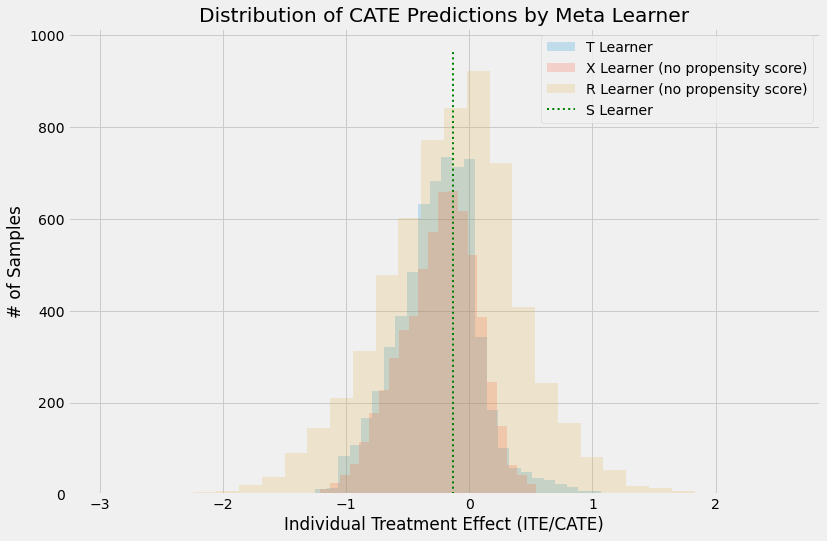

In [26]:
alpha=0.2
bins=30
plt.figure(figsize=(12,8))
plt.hist(cate_t, alpha=alpha, bins=bins, label='T Learner')
plt.hist(cate_x_no_p, alpha=alpha, bins=bins, label='X Learner (no propensity score)')
plt.hist(cate_r_no_p, alpha=alpha, bins=bins, label='R Learner (no propensity score)')
plt.vlines(cate_s[0], 0, plt.axes().get_ylim()[1], label='S Learner',
           linestyles='dotted', colors='green', linewidth=2)
plt.title('Distribution of CATE Predictions by Meta Learner')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples')
_=plt.legend()

- From this graph, we can see the distirbution of CATE is smaller using R-Learner, followed by X-Learner, and T-Learner

## 7.Validating Meta-Learner Accuracy

In [27]:
train_summary, validation_summary = get_synthetic_summary_holdout(simulate_nuisance_and_easy_treatment,
                                                                  n=10000,
                                                                  valid_size=0.2,
                                                                  k=10)

In [28]:
train_summary

,Abs % Error of ATE,MSE,KL Divergence
Actuals,0.000000,0.000000,0.000000
S Learner (LR),0.380348,0.078882,3.804788
S Learner (XGB),0.093429,0.101874,0.329845
T Learner (LR),0.359376,0.037472,0.328521
T Learner (XGB),0.078027,0.585894,1.003420
X Learner (LR),0.359376,0.037472,0.328521
X Learner (XGB),0.060033,0.267481,0.580647
R Learner (LR),0.298113,0.038224,0.316706
R Learner (XGB),0.124872,0.835324,1.089672


In [29]:
validation_summary

,Abs % Error of ATE,MSE,KL Divergence
Actuals,0.000000,0.000000,0.000000
S Learner (LR),0.380487,0.079192,3.821329
S Learner (XGB),0.096521,0.097260,0.330472
T Learner (LR),0.360003,0.037601,0.361046
T Learner (XGB),0.083234,0.377074,0.791648
X Learner (LR),0.360003,0.037601,0.361046
X Learner (XGB),0.059643,0.198492,0.458773
R Learner (LR),0.298059,0.038334,0.346991
R Learner (XGB),0.132853,0.536155,0.911014


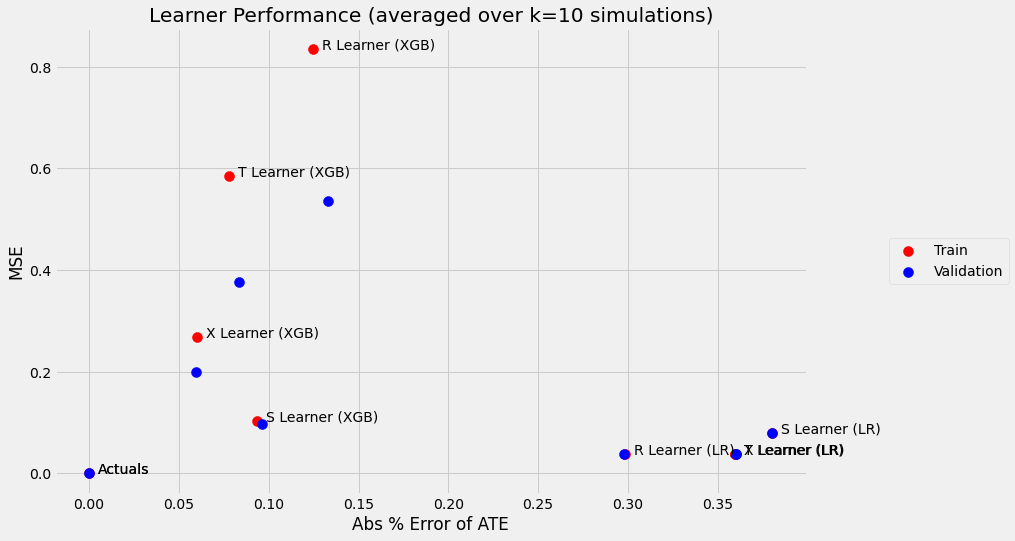

In [30]:
scatter_plot_summary_holdout(train_summary,
                             validation_summary,
                             k=10,
                             label=['Train', 'Validation'],
                             drop_learners=[],
                             drop_cols=[])

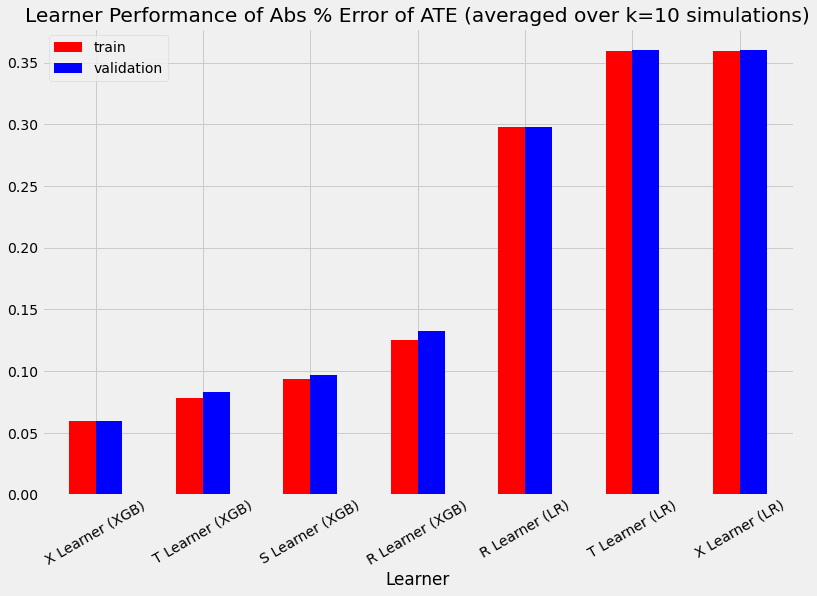

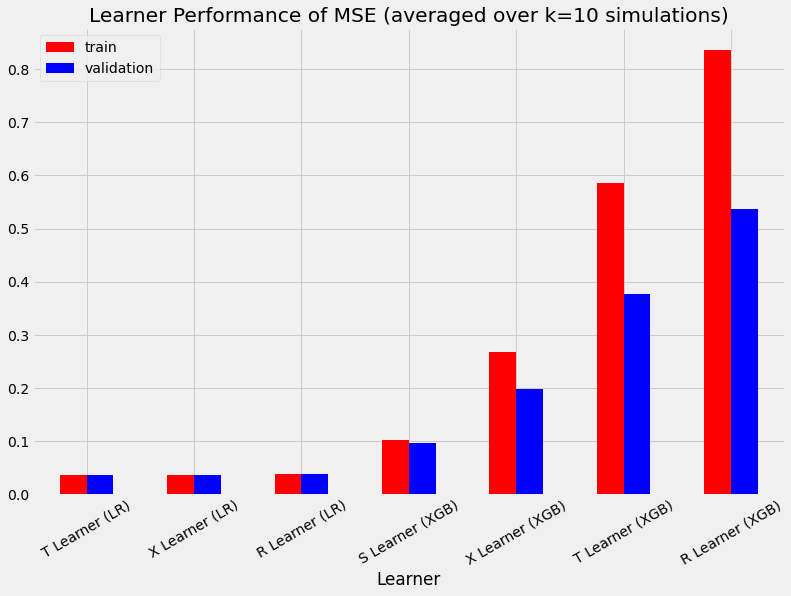

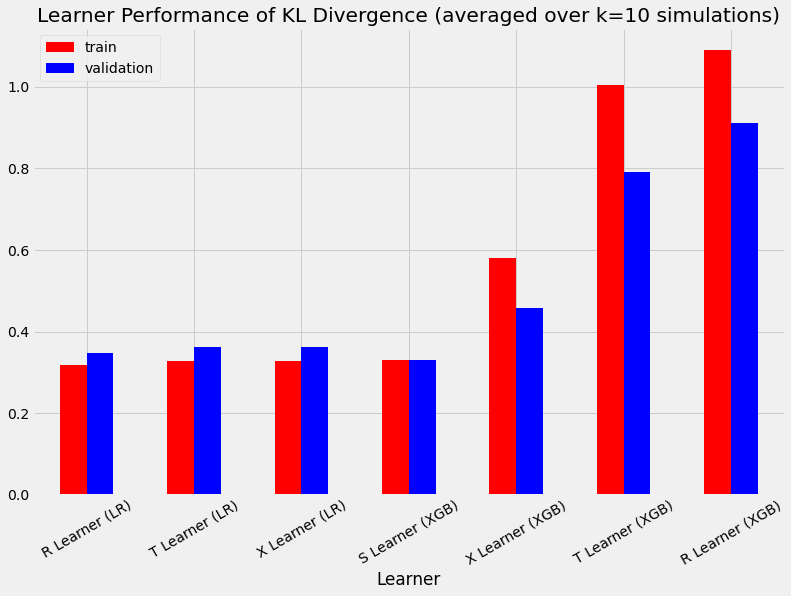

In [31]:
bar_plot_summary_holdout(train_summary,
                         validation_summary,
                         k=10,
                         drop_learners=['S Learner (LR)'],
                         drop_cols=[])

In [32]:
# Single simulation
train_preds, valid_preds = get_synthetic_preds_holdout(simulate_nuisance_and_easy_treatment,
                                                       n=50000,
                                                       valid_size=0.2)

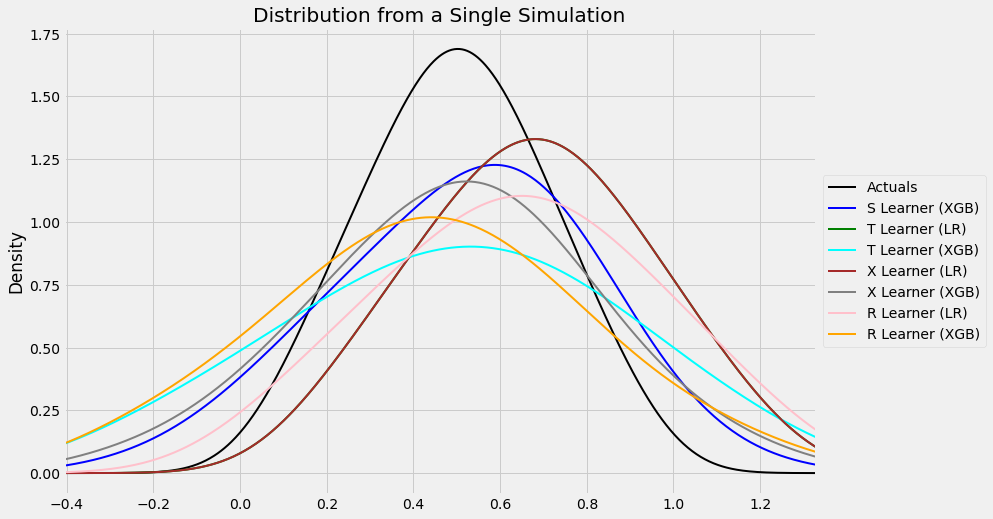

In [33]:
#distribution plot for signle simulation of Training
distr_plot_single_sim(train_preds, kind='kde', linewidth=2, bw_method=0.5,
                      drop_learners=['S Learner (LR)',' S Learner (XGB)'])

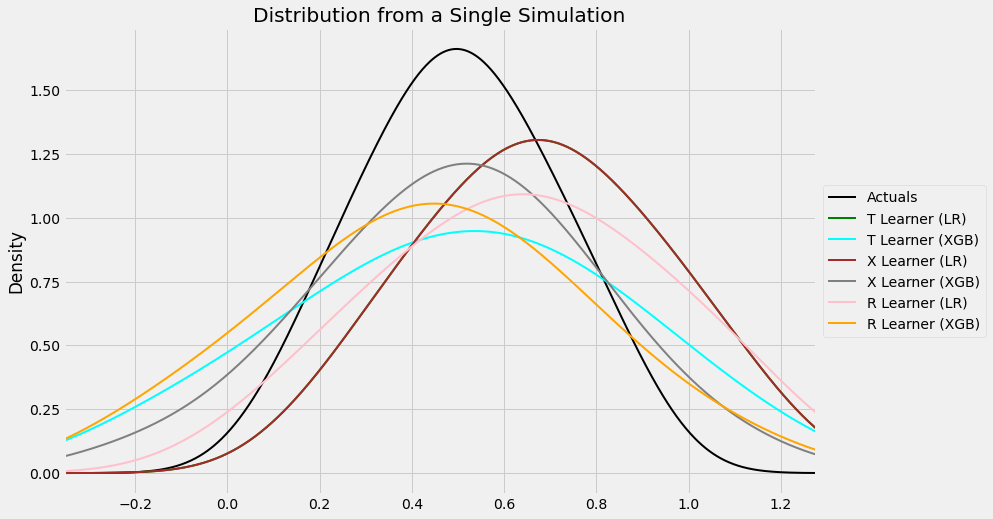

In [34]:
#distribution plot for signle simulation of Validaiton
distr_plot_single_sim(valid_preds, kind='kde', linewidth=2, bw_method=0.5,
                      drop_learners=['S Learner (LR)', 'S Learner (XGB)'])

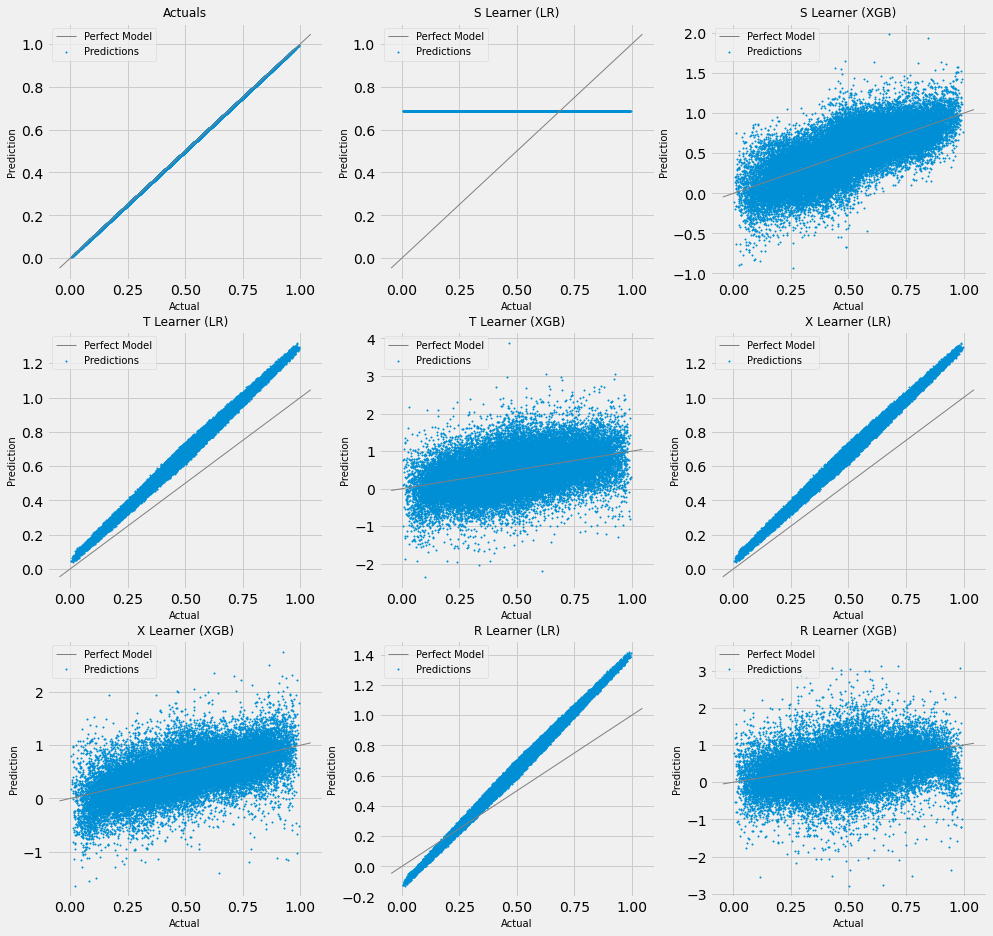

In [35]:
# Scatter Plots for a Single Simulation of Training Data
scatter_plot_single_sim(train_preds)

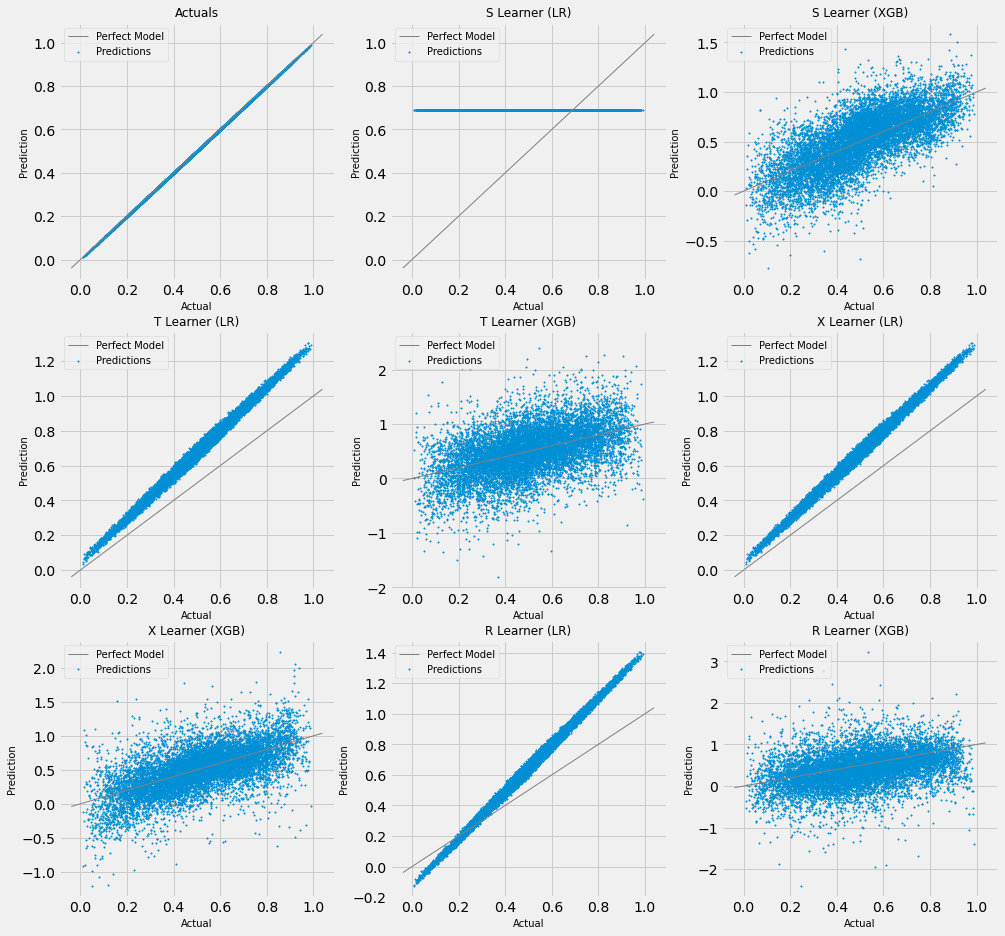

In [36]:
# Scatter Plots for a Single Simulation of Validaiton Data
scatter_plot_single_sim(valid_preds)

,Learner,cum_gain_auuc
0,Actuals,4.918721e+06
6,R Learner (LR),4.916409e+06
2,T Learner (LR),4.915418e+06
4,X Learner (LR),4.915418e+06
1,S Learner (XGB),4.665995e+06
5,X Learner (XGB),4.555322e+06
3,T Learner (XGB),4.420418e+06
7,R Learner (XGB),4.339324e+06
8,Random,3.990169e+06


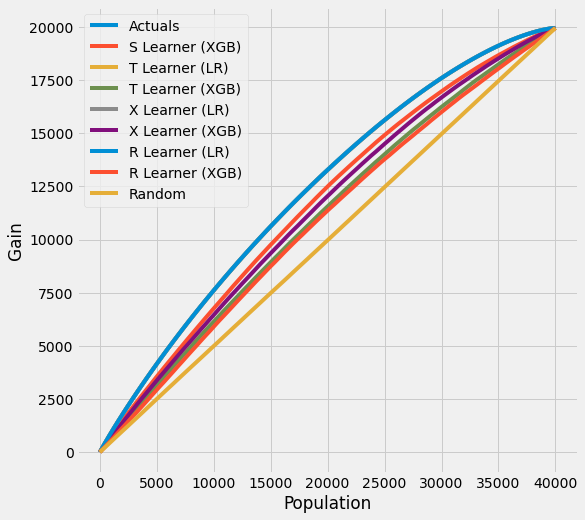

In [37]:
#Cumulative Gain AUUC values for a Single Simulation of Training Data
get_synthetic_auuc(train_preds, drop_learners=['S Learner (LR)'])

,Learner,cum_gain_auuc
0,Actuals,308763.965470
6,R Learner (LR),308625.061306
2,T Learner (LR),308566.018836
4,X Learner (LR),308566.018836
1,S Learner (XGB),292971.916894
5,X Learner (XGB),287211.399677
3,T Learner (XGB),278941.976234
7,R Learner (XGB),273762.547990
8,Random,250064.673077


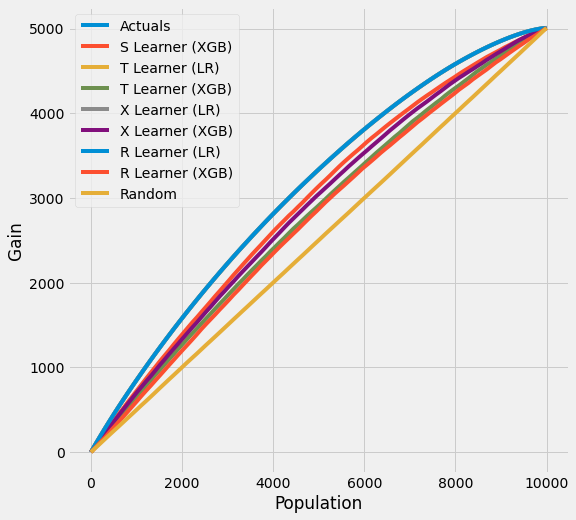

In [38]:
# Cumulative Gain AUUC values for a Single Simulation of Validaiton Data
get_synthetic_auuc(valid_preds, drop_learners=['S Learner (LR)'])

- Overalll, S Learner using either XGB or LR tends to perform better

## 8. Plot Feature Importance
- We will be using S-Learner as it performs relative better

In [39]:
base_algo = LGBMRegressor()
# base_algo = XGBRegressor()
# base_algo = RandomForestRegressor()
# base_algo = LinearRegression()

slearner = BaseSRegressor(base_algo, control_name='control')
slearner.estimate_ate(X, w_multi, y)

array([-0.03634109])

In [40]:
slearner_tau = slearner.fit_predict(X, w_multi, y)

#### Feature Importance (methos = auto)

In [41]:
slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{'treatment_A': AGE                  0.278052
 After2014            0.261085
 BMI                  0.174467
 ASACLAS              0.076459
 WEIGHT               0.072779
 HEIGHT               0.055521
 HYPERMED             0.034234
 plastic_after2014    0.025375
 DIAB_NON-INSULIN     0.007932
 CPT_15758            0.004355
 DIAB_No              0.003829
 CPT_19364            0.002359
 SMOKE                0.002176
 CPT_15756            0.000802
 CPT_19368            0.000186
 ELECTSURG_No         0.000154
 SEX                  0.000095
 DIAB_INSULIN         0.000081
 CPT_15757            0.000040
 ELECTSURG_Yes        0.000015
 WNDCLAS              0.000003
 CPT_20955            0.000000
 CPT_20962            0.000000
 CPT_26551            0.000000
 DIALYSIS             0.000000
 CPT_26553            0.000000
 CPT_42894            0.000000
 ELECTSURG_Unknown    0.000000
 CPT_15842            0.000000
 dtype: float64}

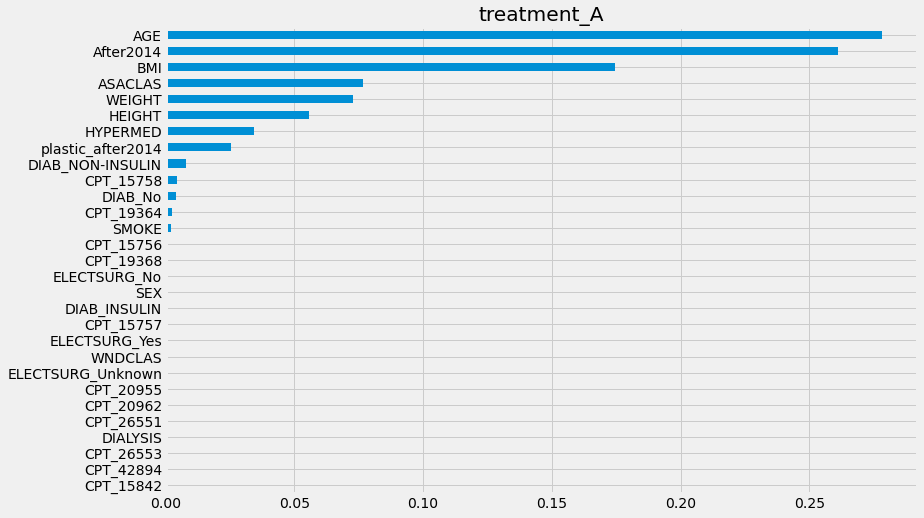

In [42]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

#### Feature Importance (method = permutation)

In [43]:
slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{'treatment_A': After2014            0.601954
 AGE                  0.531055
 BMI                  0.302158
 ASACLAS              0.207484
 WEIGHT               0.118201
 HEIGHT               0.114171
 plastic_after2014    0.079156
 HYPERMED             0.064358
 CPT_19364            0.011456
 CPT_15758            0.007439
 DIAB_NON-INSULIN     0.007393
 SMOKE                0.004624
 DIAB_No              0.002880
 CPT_15756            0.001680
 ELECTSURG_No         0.000393
 DIAB_INSULIN         0.000249
 CPT_15757            0.000174
 WNDCLAS              0.000062
 DIALYSIS             0.000000
 CPT_15842            0.000000
 CPT_20955            0.000000
 CPT_20962            0.000000
 CPT_26551            0.000000
 CPT_26553            0.000000
 CPT_42894            0.000000
 ELECTSURG_Unknown    0.000000
 ELECTSURG_Yes        0.000000
 SEX                 -0.000002
 CPT_19368           -0.000131
 dtype: float64}

In [44]:
start_time = time.time()

slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 0.27723073959350586 seconds


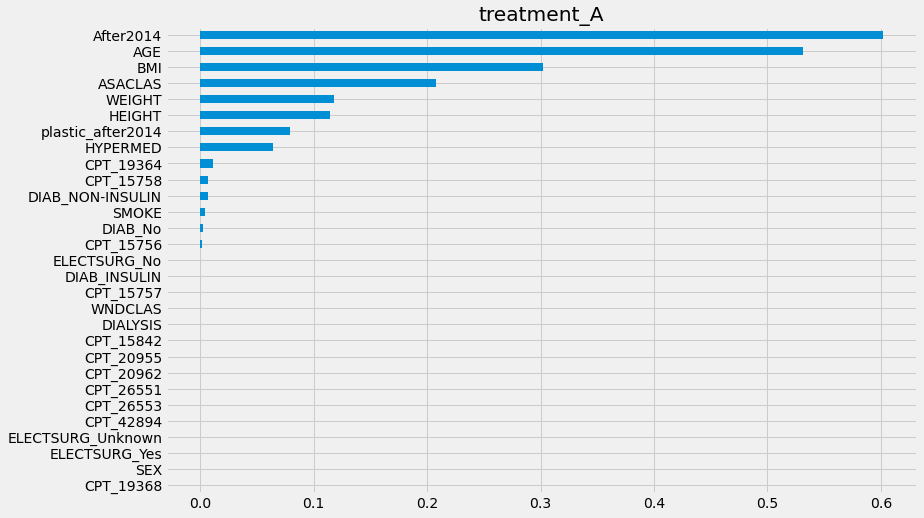

In [45]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

#### Feature Importance (sklearn.inspection.permutation_importance)

In [46]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, slearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 0.30415821075439453 seconds


In [47]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

After2014            0.601954
AGE                  0.531055
BMI                  0.302158
ASACLAS              0.207484
WEIGHT               0.118201
HEIGHT               0.114171
plastic_after2014    0.079156
HYPERMED             0.064358
CPT_19364            0.011456
CPT_15758            0.007439
DIAB_NON-INSULIN     0.007393
SMOKE                0.004624
DIAB_No              0.002880
CPT_15756            0.001680
ELECTSURG_No         0.000393
DIAB_INSULIN         0.000249
CPT_15757            0.000174
WNDCLAS              0.000062
DIALYSIS             0.000000
CPT_15842            0.000000
CPT_20955            0.000000
CPT_20962            0.000000
CPT_26551            0.000000
CPT_26553            0.000000
CPT_42894            0.000000
ELECTSURG_Unknown    0.000000
ELECTSURG_Yes        0.000000
SEX                 -0.000002
CPT_19368           -0.000131
dtype: float64

Text(0.5, 1.0, 'Test Set Permutation Importances')

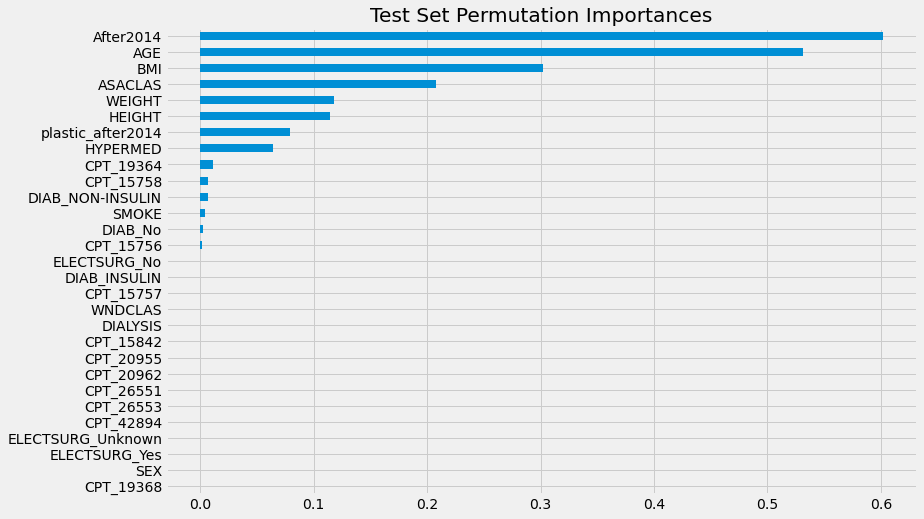

In [48]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

In [49]:
perm_imp_train = permutation_importance(
    estimator=model_tau_fit, 
    X=X_train, 
    y=y_train, 
    random_state=42).importances_mean
pd.Series(perm_imp_train, feature_names).sort_values(ascending=False)

After2014            0.619387
AGE                  0.590614
BMI                  0.312421
ASACLAS              0.240325
WEIGHT               0.144405
HEIGHT               0.118094
plastic_after2014    0.092826
HYPERMED             0.073766
CPT_19364            0.012693
DIAB_NON-INSULIN     0.008826
DIAB_No              0.006224
CPT_15758            0.005837
SMOKE                0.003050
CPT_15756            0.001474
ELECTSURG_No         0.000861
WNDCLAS              0.000538
CPT_15757            0.000524
CPT_19368            0.000209
DIAB_INSULIN         0.000152
SEX                  0.000073
CPT_20955            0.000000
CPT_20962            0.000000
DIALYSIS             0.000000
CPT_26551            0.000000
CPT_26553            0.000000
CPT_42894            0.000000
ELECTSURG_Unknown    0.000000
ELECTSURG_Yes        0.000000
CPT_15842            0.000000
dtype: float64

Text(0.5, 1.0, 'Training Set Permutation Importances')

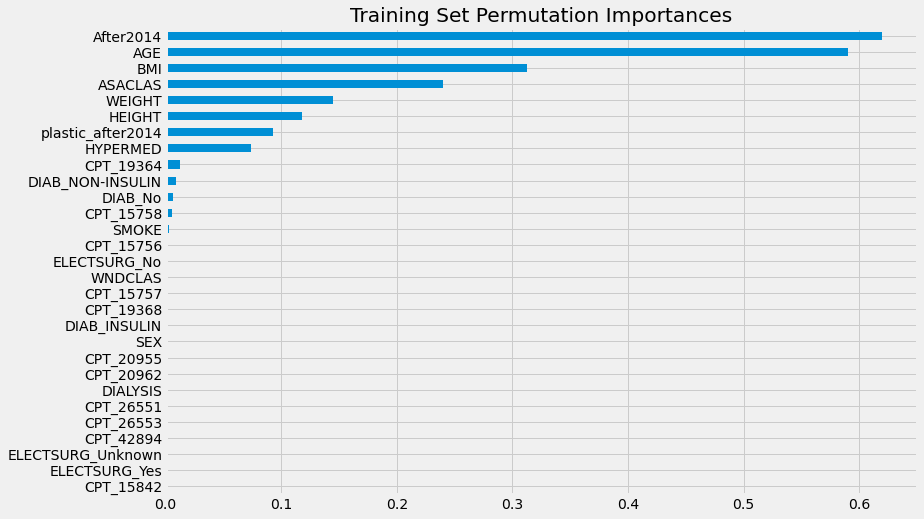

In [50]:
pd.Series(perm_imp_train, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Training Set Permutation Importances')

#### Shapley Values

In [51]:
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)
shap_slearner

{'treatment_A': array([[ 1.38925881e-05, -1.84369821e-02,  2.52921326e-02, ...,
          2.04988254e-03,  4.67708795e-04, -1.12822542e-02],
        [-3.57288501e-06,  3.37250177e-03,  7.06136279e-03, ...,
          2.40894180e-03,  6.77355152e-04, -1.59856256e-02],
        [-9.96093859e-06,  1.35837429e-02,  2.61697772e-02, ...,
          2.35735946e-03,  3.07541037e-04, -2.30369301e-02],
        ...,
        [-3.50377609e-05,  2.64934904e-02,  1.50058731e-02, ...,
          1.35813539e-03,  1.76785719e-04,  3.16844899e-03],
        [-3.48337942e-04, -3.45768157e-02, -1.44423830e-02, ...,
          1.06888182e-03,  1.07423530e-04,  7.08289347e-03],
        [ 1.53447140e-04,  1.95596968e-02, -8.04556345e-03, ...,
          1.17199962e-03,  1.89247111e-04,  1.27695077e-03]])}

In [52]:
np.mean(np.abs(shap_slearner['treatment_A']),axis=0)

array([3.19386808e-05, 2.76353891e-02, 8.44865422e-03, 9.65493877e-03,
       1.58791825e-02, 5.69013423e-03, 0.00000000e+00, 7.25450818e-04,
       5.40230370e-05, 2.07115185e-02, 3.52815576e-02, 2.14710433e-04,
       1.10592926e-04, 1.20248932e-03, 0.00000000e+00, 1.74446664e-03,
       1.02401791e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.62462935e-04, 0.00000000e+00,
       3.98679291e-05, 7.25127064e-05, 2.83641665e-03, 5.14287425e-04,
       7.97901569e-03])

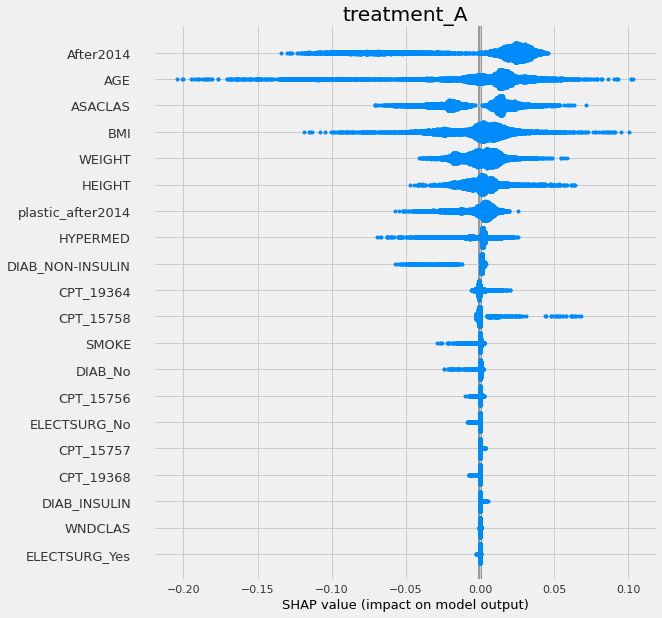

In [53]:
# Plot shap values without specifying shap_dict
slearner.plot_shap_values(X=X, tau=slearner_tau, features=feature_names)

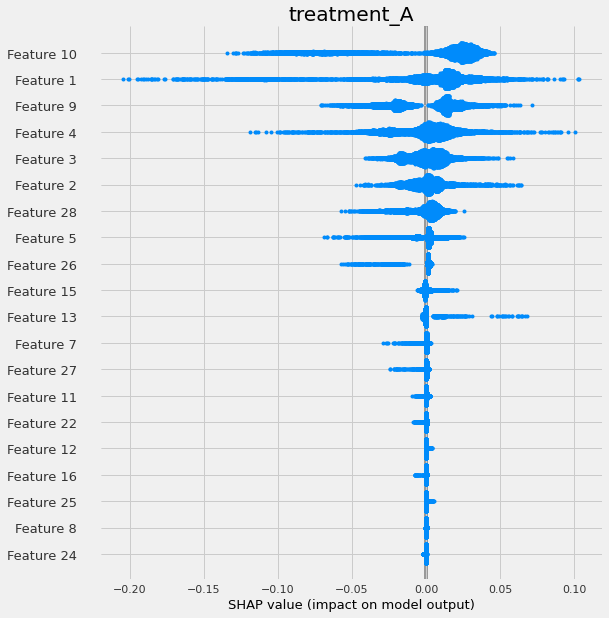

In [54]:
# Plot shap values WITH specifying shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner)

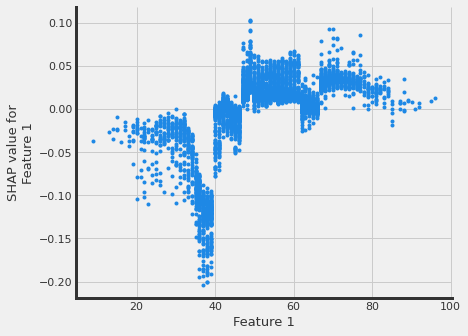

In [55]:
# interaction_idx set to None (no color coding for interaction effects)
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=1,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=None,
                              shap_dict=shap_slearner)

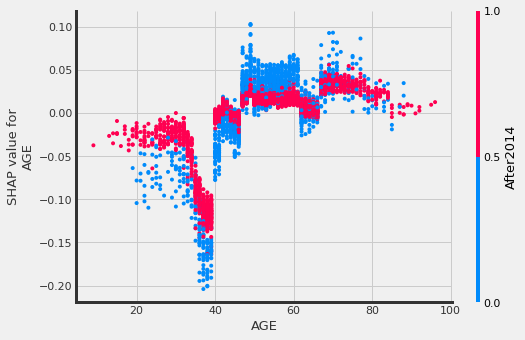

In [56]:
# interaction_idx set to specific index
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=1,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=10,
                              shap_dict=shap_slearner, 
                              features=feature_names)

## 9.Analysis

From the ATE computed using different method, we can conclude that:
-	Ate using S,X,R,T-Learner’s difference in mean between the treatment group and the control group are both negative.
-	A negative ATE suggest that the new technology lower down the surgical site infection. 

Using the validation dataset, S and X-Learner using XGB tends to performs better in terns of both the MSE and absolute percentage error of ATE. 

From the feature importance plot using permutation,  the cofounders age, BMI, ASACLAS, weight, height and the interaction term between plastics surgeries and surgeries after 2014 have a high contribution in the model. 